<a href="https://colab.research.google.com/github/Rizkiramdani04/Portofolio_DS_DA/blob/main/Clustering_Produk_Tabungan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [ ]:
pd.set_option('display.max_columns',None)


In [ ]:
data=pd.read_csv('/content/clustering_data.csv')
dataset=data.copy()
dataset.dtypes

,0
GCIF,object
Area,object
Jalur_Pembukaan,object
Vintage,object
Usia,float64
Jenis_Kelamin,object
Status_Perkawinan,object
Jumlah_Anak,int64
Pendidikan,object
Produk_Tabungan,int64


## Data Understanding

In [ ]:
dataset.groupby(('Area'))['Area'].count()

,Area
Area,
Bandung,6917
Bogor,1191
Jakarta,7017
Jogja,3001
Solo,5001
Surabaya,5002


In [ ]:
dataset.groupby(('Vintage'))['Vintage'].count()

,Vintage
Vintage,
2 - 3 Tahun,13953
< 1 Tahun,9278
> 4 Tahun,4898


In [ ]:
dataset.groupby(('Jalur_Pembukaan'))['Jalur_Pembukaan'].count()

,Jalur_Pembukaan
Jalur_Pembukaan,
Aplikasi Digital,6216
Cabang,5856
Internet Banking,5795
Telemarketing,10262


In [ ]:
dataset.groupby(('Status_Perkawinan'))['Status_Perkawinan'].count()

,Status_Perkawinan
Status_Perkawinan,
Belum Menikah,8168
Cerai,4077
Janda/Duda,4045
Menikah,11839


## Data Preparation

In [ ]:
dataset.isnull().sum()

,0
GCIF,0
Area,0
Jalur_Pembukaan,0
Vintage,0
Usia,4045
Jenis_Kelamin,0
Status_Perkawinan,0
Jumlah_Anak,0
Pendidikan,0
Produk_Tabungan,0


In [ ]:
dataset=dataset.dropna()
dataset.isnull().sum()

,0
GCIF,0
Area,0
Jalur_Pembukaan,0
Vintage,0
Usia,0
Jenis_Kelamin,0
Status_Perkawinan,0
Jumlah_Anak,0
Pendidikan,0
Produk_Tabungan,0


In [ ]:
dataset.duplicated().sum()

0

## Pengecekan Data Outlier

In [ ]:
dataset.count()

,0
GCIF,24084
Area,24084
Jalur_Pembukaan,24084
Vintage,24084
Usia,24084
Jenis_Kelamin,24084
Status_Perkawinan,24084
Jumlah_Anak,24084
Pendidikan,24084
Produk_Tabungan,24084


In [ ]:
from scipy import stats
z_scores=stats.zscore(dataset[['Usia','Pendapatan_Tahunan','Total_Relationship_Balance']])
dataset=dataset[(z_scores<3).all(axis=1)]
dataset.count()

,0
GCIF,23704
Area,23704
Jalur_Pembukaan,23704
Vintage,23704
Usia,23704
Jenis_Kelamin,23704
Status_Perkawinan,23704
Jumlah_Anak,23704
Pendidikan,23704
Produk_Tabungan,23704


## Filtering Datqa Telemarketing Only

In [ ]:
dataset1=dataset[dataset['Jalur_Pembukaan']=='Telemarketing']
dataset1

,GCIF,Area,Jalur_Pembukaan,Vintage,Usia,Jenis_Kelamin,Status_Perkawinan,Jumlah_Anak,Pendidikan,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
1,G18528,Jakarta,Telemarketing,< 1 Tahun,23.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,198,10668586
2,G22419,Surabaya,Telemarketing,< 1 Tahun,30.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,280,299076075
7,G13193,Solo,Telemarketing,< 1 Tahun,29.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,295,76653088
8,G09296,Jakarta,Telemarketing,< 1 Tahun,49.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,443,247157199
9,G09228,Jakarta,Telemarketing,< 1 Tahun,21.0,Perempuan,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,257,27585562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28089,G19583,Bandung,Telemarketing,2 - 3 Tahun,54.0,Laki-laki,Menikah,0,Tidak Sekolah Formal,1,1,1,1,0,1,5,489,321693904
28090,G18081,Jakarta,Telemarketing,2 - 3 Tahun,58.0,Laki-laki,Belum Menikah,0,Tidak Sekolah Formal,1,1,1,1,1,0,5,658,224477967
28092,G18530,Bandung,Telemarketing,2 - 3 Tahun,42.0,Laki-laki,Cerai,3,Tidak Sekolah Formal,1,1,1,1,0,1,5,585,411871605
28095,G03782,Jogja,Telemarketing,2 - 3 Tahun,44.0,Laki-laki,Cerai,1,Tidak Sekolah Formal,1,1,0,1,1,1,5,279,161744694


In [ ]:
dataset1=dataset.drop(columns=['GCIF','Jalur_Pembukaan']).reset_index(drop=True)
dataset1=dataset1.reset_index()
dataset1

,index,Area,Vintage,Usia,Jenis_Kelamin,Status_Perkawinan,Jumlah_Anak,Pendidikan,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,0,Bogor,< 1 Tahun,69.0,Laki-laki,Menikah,3,Doktor,1,0,0,0,0,0,1,747,44607
1,1,Jakarta,< 1 Tahun,23.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,198,10668586
2,2,Surabaya,< 1 Tahun,30.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,280,299076075
3,3,Bandung,< 1 Tahun,45.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,431,417250579
4,4,Bandung,< 1 Tahun,34.0,Perempuan,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,184,453573593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23699,23699,Jogja,2 - 3 Tahun,41.0,Perempuan,Belum Menikah,0,Tidak Sekolah Formal,1,1,1,1,1,1,6,325,167993431
23700,23700,Solo,2 - 3 Tahun,28.0,Laki-laki,Menikah,0,Tidak Sekolah Formal,1,1,1,1,1,1,6,290,189632802
23701,23701,Jakarta,2 - 3 Tahun,52.0,Laki-laki,Belum Menikah,0,Tidak Sekolah Formal,1,1,1,1,1,1,6,734,166478751
23702,23702,Solo,2 - 3 Tahun,47.0,Perempuan,Menikah,0,Tidak Sekolah Formal,1,1,1,1,1,1,6,364,600734753


## Pembagian Dataset Experiment
1. Experiment 0 --> Semua Variabel Digunakan
2. Experiment 1 --> Menggunakan Demographics
3. Experiment 2 --> Menggunakan Financial Related Variable

In [ ]:
data1=dataset1.iloc[:,1:8]
data1

,Area,Vintage,Usia,Jenis_Kelamin,Status_Perkawinan,Jumlah_Anak,Pendidikan
0,Bogor,< 1 Tahun,69.0,Laki-laki,Menikah,3,Doktor
1,Jakarta,< 1 Tahun,23.0,Laki-laki,Belum Menikah,0,Doktor
2,Surabaya,< 1 Tahun,30.0,Laki-laki,Belum Menikah,0,Doktor
3,Bandung,< 1 Tahun,45.0,Laki-laki,Belum Menikah,0,Doktor
4,Bandung,< 1 Tahun,34.0,Perempuan,Belum Menikah,0,Doktor
...,...,...,...,...,...,...,...
23699,Jogja,2 - 3 Tahun,41.0,Perempuan,Belum Menikah,0,Tidak Sekolah Formal
23700,Solo,2 - 3 Tahun,28.0,Laki-laki,Menikah,0,Tidak Sekolah Formal
23701,Jakarta,2 - 3 Tahun,52.0,Laki-laki,Belum Menikah,0,Tidak Sekolah Formal
23702,Solo,2 - 3 Tahun,47.0,Perempuan,Menikah,0,Tidak Sekolah Formal


In [ ]:
data2=dataset1.iloc[:,8:17]
data2

,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,1,0,0,0,0,0,1,747,44607
1,1,0,0,0,0,0,1,198,10668586
2,1,0,0,0,0,0,1,280,299076075
3,1,0,0,0,0,0,1,431,417250579
4,1,0,0,0,0,0,1,184,453573593
...,...,...,...,...,...,...,...,...,...
23699,1,1,1,1,1,1,6,325,167993431
23700,1,1,1,1,1,1,6,290,189632802
23701,1,1,1,1,1,1,6,734,166478751
23702,1,1,1,1,1,1,6,364,600734753


## Melakukan Encoding untk Data Category

In [ ]:
data1=pd.get_dummies(data1,columns=['Area','Jenis_Kelamin','Status_Perkawinan','Pendidikan','Vintage']).astype(int)
data1

,Usia,Jumlah_Anak,Area_Bandung,Area_Bogor,Area_Jakarta,Area_Jogja,Area_Solo,Area_Surabaya,Jenis_Kelamin_Laki-laki,Jenis_Kelamin_Perempuan,Status_Perkawinan_Belum Menikah,Status_Perkawinan_Cerai,Status_Perkawinan_Menikah,Pendidikan_Doktor,Pendidikan_Magister,Pendidikan_SD,Pendidikan_SMA,Pendidikan_SMP,Pendidikan_Sarjana,Pendidikan_Tidak Sekolah Formal,Vintage_2 - 3 Tahun,Vintage_< 1 Tahun,Vintage_> 4 Tahun
0,69,3,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
1,23,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0
2,30,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0
3,45,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0
4,34,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23699,41,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0
23700,28,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0
23701,52,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0
23702,47,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0


## Standarisasi Data Numerik

In [ ]:
predname_num=data2.columns
predname_num

Index(['Produk_Tabungan', 'Produk_Deposito', 'Produk_Kartu_Kredit',
       'Produk_Kredit_Rumah', 'Produk_Kredit_Kendaraan',
       'Produk_Kredit_Dana_Tunai', 'Total_Kepemilikan_Produk',
       'Pendapatan_Tahunan', 'Total_Relationship_Balance'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
pt = StandardScaler()
X_num = pd.DataFrame(pt.fit_transform(data2))
X_num.head()

,0,1,2,3,4,5,6,7,8
0,0.309817,-1.218054,-0.693102,-1.187092,-0.434541,-1.116422,-2.044994,1.768927,-1.664899
1,0.309817,-1.218054,-0.693102,-1.187092,-0.434541,-1.116422,-2.044994,-1.258586,-1.591383
2,0.309817,-1.218054,-0.693102,-1.187092,-0.434541,-1.116422,-2.044994,-0.806389,0.404361
3,0.309817,-1.218054,-0.693102,-1.187092,-0.434541,-1.116422,-2.044994,0.026315,1.222113
4,0.309817,-1.218054,-0.693102,-1.187092,-0.434541,-1.116422,-2.044994,-1.335791,1.473464


In [ ]:
X_num.columns=predname_num
X_num.head()

,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,0.309817,-1.218054,-0.693102,-1.187092,-0.434541,-1.116422,-2.044994,1.768927,-1.664899
1,0.309817,-1.218054,-0.693102,-1.187092,-0.434541,-1.116422,-2.044994,-1.258586,-1.591383
2,0.309817,-1.218054,-0.693102,-1.187092,-0.434541,-1.116422,-2.044994,-0.806389,0.404361
3,0.309817,-1.218054,-0.693102,-1.187092,-0.434541,-1.116422,-2.044994,0.026315,1.222113
4,0.309817,-1.218054,-0.693102,-1.187092,-0.434541,-1.116422,-2.044994,-1.335791,1.473464


## Pengecekan Korelasi

In [ ]:
corrtest1=data1.corr().abs()
corrtest2=X_num.corr().abs()

In [ ]:
# Membuang Nilai Redundan Pada Matriks
upper = corrtest1.where(np.triu(np.ones(corrtest1.shape), k=1).astype(bool))
upper1 = corrtest2.where(np.triu(np.ones(corrtest2.shape), k=1).astype(bool))

# Mencari Nilai Yang Berkorelasi di atas 0.7
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
to_drop1 = [column for column in upper1.columns if any(upper1[column] > 0.7)]

# Menghapus Kolom Yang Berkorelasi di atas 0.7
data1 = data1.drop(to_drop, axis=1)
data2 = data2.drop(to_drop1, axis=1)

In [ ]:
data1

,Usia,Jumlah_Anak,Area_Bandung,Area_Bogor,Area_Jakarta,Area_Jogja,Area_Solo,Area_Surabaya,Jenis_Kelamin_Laki-laki,Status_Perkawinan_Belum Menikah,Status_Perkawinan_Cerai,Pendidikan_Doktor,Pendidikan_Magister,Pendidikan_SD,Pendidikan_SMA,Pendidikan_SMP,Pendidikan_Sarjana,Pendidikan_Tidak Sekolah Formal,Vintage_2 - 3 Tahun,Vintage_< 1 Tahun,Vintage_> 4 Tahun
0,69,3,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
1,23,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0
2,30,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0
3,45,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0
4,34,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23699,41,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
23700,28,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0
23701,52,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0
23702,47,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [ ]:
X_num

,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,0.309817,-1.218054,-0.693102,-1.187092,-0.434541,-1.116422,-2.044994,1.768927,-1.664899
1,0.309817,-1.218054,-0.693102,-1.187092,-0.434541,-1.116422,-2.044994,-1.258586,-1.591383
2,0.309817,-1.218054,-0.693102,-1.187092,-0.434541,-1.116422,-2.044994,-0.806389,0.404361
3,0.309817,-1.218054,-0.693102,-1.187092,-0.434541,-1.116422,-2.044994,0.026315,1.222113
4,0.309817,-1.218054,-0.693102,-1.187092,-0.434541,-1.116422,-2.044994,-1.335791,1.473464
...,...,...,...,...,...,...,...,...,...
23699,0.309817,0.820982,1.442790,0.842395,2.301279,0.895718,2.748960,-0.558233,-0.502715
23700,0.309817,0.820982,1.442790,0.842395,2.301279,0.895718,2.748960,-0.751243,-0.352973
23701,0.309817,0.820982,1.442790,0.842395,2.301279,0.895718,2.748960,1.697237,-0.513196
23702,0.309817,0.820982,1.442790,0.842395,2.301279,0.895718,2.748960,-0.343163,2.491801


In [ ]:
data_gabungan=pd.concat([data1,X_num],axis=1,join='inner')
data_gabungan

,Usia,Jumlah_Anak,Area_Bandung,Area_Bogor,Area_Jakarta,Area_Jogja,Area_Solo,Area_Surabaya,Jenis_Kelamin_Laki-laki,Status_Perkawinan_Belum Menikah,Status_Perkawinan_Cerai,Pendidikan_Doktor,Pendidikan_Magister,Pendidikan_SD,Pendidikan_SMA,Pendidikan_SMP,Pendidikan_Sarjana,Pendidikan_Tidak Sekolah Formal,Vintage_2 - 3 Tahun,Vintage_< 1 Tahun,Vintage_> 4 Tahun,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,69,3,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0.309817,-1.218054,-0.693102,-1.187092,-0.434541,-1.116422,-2.044994,1.768927,-1.664899
1,23,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0.309817,-1.218054,-0.693102,-1.187092,-0.434541,-1.116422,-2.044994,-1.258586,-1.591383
2,30,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0.309817,-1.218054,-0.693102,-1.187092,-0.434541,-1.116422,-2.044994,-0.806389,0.404361
3,45,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0.309817,-1.218054,-0.693102,-1.187092,-0.434541,-1.116422,-2.044994,0.026315,1.222113
4,34,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0.309817,-1.218054,-0.693102,-1.187092,-0.434541,-1.116422,-2.044994,-1.335791,1.473464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23699,41,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0.309817,0.820982,1.442790,0.842395,2.301279,0.895718,2.748960,-0.558233,-0.502715
23700,28,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0.309817,0.820982,1.442790,0.842395,2.301279,0.895718,2.748960,-0.751243,-0.352973
23701,52,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0.309817,0.820982,1.442790,0.842395,2.301279,0.895718,2.748960,1.697237,-0.513196
23702,47,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0.309817,0.820982,1.442790,0.842395,2.301279,0.895718,2.748960,-0.343163,2.491801


## Model Evaluation

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Variasi hyperparameter (jumlah cluster)
for n_clusters in range(3, 6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(data_gabungan)
    silhouette_avg = silhouette_score(data_gabungan, cluster_labels)
    print(f"Silhouette Score (K-Means) -"+str(n_clusters)+" : "+str(silhouette_avg))
    dataset1['Clustering_KMeans_Exp0_'+str(n_clusters)] = cluster_labels



Silhouette Score (K-Means) -3 : 0.43558517863909885
Silhouette Score (K-Means) -4 : 0.32609967630256526
Silhouette Score (K-Means) -5 : 0.3271161606775858


In [ ]:
for n_clusters in range(3, 6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(data1)
    silhouette_avg = silhouette_score(data1, cluster_labels)
    print(f"Silhouette Score (K-Means) -"+str(n_clusters)+" : "+str(silhouette_avg))
    dataset1['Clustering_KMeans_Exp1_'+str(n_clusters)] = cluster_labels


Silhouette Score (K-Means) -3 : 0.5003649304987893
Silhouette Score (K-Means) -4 : 0.44477034523975806
Silhouette Score (K-Means) -5 : 0.4103793680782028


In [ ]:
for n_clusters in range(3, 6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(X_num)
    silhouette_avg = silhouette_score(X_num, cluster_labels)
    print(f"Silhouette Score (K-Means) -"+str(n_clusters)+" : "+str(silhouette_avg))
    dataset1['Clustering_KMeans_Exp2_'+str(n_clusters)] = cluster_labels


Silhouette Score (K-Means) -3 : 0.13829202086441275
Silhouette Score (K-Means) -4 : 0.15582966941805323
Silhouette Score (K-Means) -5 : 0.19840432162890523


In [ ]:
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.5 MB/s eta 0:00:00


In [ ]:
for n_clusters in range(3, 6):
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmedoids.fit_predict(data_gabungan)
    silhouette_avg = silhouette_score(data_gabungan, cluster_labels)
    print(f"Silhouette Score (K-Medoids) -"+str(n_clusters)+" : "+str(silhouette_avg))
    dataset1['Clustering_KMedoids_Exp0_'+str(n_clusters)] = cluster_labels

Silhouette Score (K-Medoids) -3 : 0.4316047910772045
Silhouette Score (K-Medoids) -4 : 0.3225009215859214
Silhouette Score (K-Medoids) -5 : 0.27767035807862595


In [ ]:
for n_clusters in range(3, 6):
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmedoids.fit_predict(data1)
    silhouette_avg = silhouette_score(data1, cluster_labels)
    print(f"Silhouette Score (K-Medoids) -"+str(n_clusters)+" : "+str(silhouette_avg))
    dataset1['Clustering_KMedoids_Exp1_'+str(n_clusters)] = cluster_labels

/usr/local/lib/python3.11/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(


Silhouette Score (K-Medoids) -3 : 0.006483395049488895


/usr/local/lib/python3.11/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(


Silhouette Score (K-Medoids) -4 : -0.0006940308573819788


/usr/local/lib/python3.11/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(


Silhouette Score (K-Medoids) -5 : -0.002562742315300754


In [ ]:
for n_clusters in range(3, 6):
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmedoids.fit_predict(X_num)
    silhouette_avg = silhouette_score(X_num, cluster_labels)
    print(f"Silhouette Score (K-Medoids) -"+str(n_clusters)+" : "+str(silhouette_avg))
    dataset1['Clustering_KMedoids_Exp2_'+str(n_clusters)] = cluster_labels

Silhouette Score (K-Medoids) -3 : 0.11643370208554636
Silhouette Score (K-Medoids) -4 : 0.08489214459464887
Silhouette Score (K-Medoids) -5 : 0.08869235134913075


## Analisa Hasil

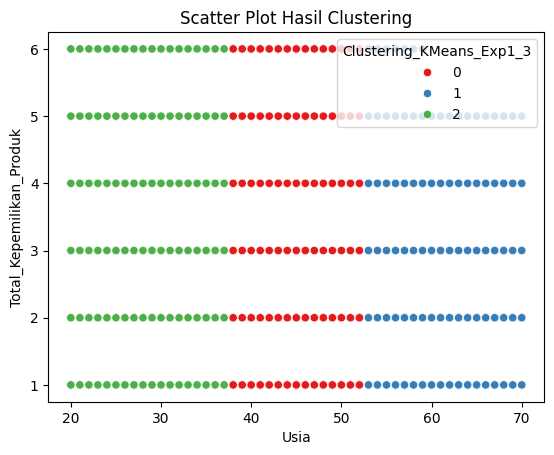

In [ ]:
    sns.scatterplot(data=dataset1, x='Usia', y='Total_Kepemilikan_Produk', hue='Clustering_KMeans_Exp1_3', palette='Set1')
    plt.title('Scatter Plot Hasil Clustering')
    plt.show()

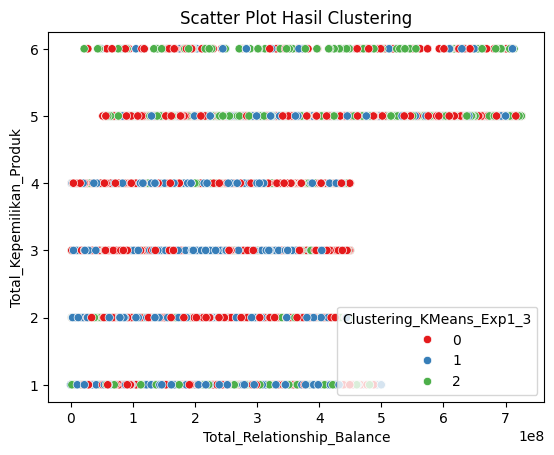

In [ ]:
    sns.scatterplot(data=dataset1, x='Total_Relationship_Balance', y='Total_Kepemilikan_Produk', hue='Clustering_KMeans_Exp1_3', palette='Set1')
    plt.title('Scatter Plot Hasil Clustering')
    plt.show()

In [ ]:
cluster_means = dataset1[['Usia','Jumlah_Anak','Produk_Tabungan','Produk_Deposito','Produk_Kartu_Kredit','Produk_Kredit_Rumah','Produk_Kredit_Kendaraan','Produk_Kredit_Dana_Tunai','Total_Kepemilikan_Produk','Total_Relationship_Balance','Clustering_KMeans_Exp1_3']].groupby('Clustering_KMeans_Exp1_3').mean()
print(cluster_means)
pd

                               Usia  Jumlah_Anak  Produk_Tabungan  \
Clustering_KMeans_Exp1_3                                            
0                         45.587693     1.297543         0.985896   
1                         58.621065     1.506381         0.667858   
2                         29.425235     1.197897         1.000000   

                          Produk_Deposito  Produk_Kartu_Kredit  \
Clustering_KMeans_Exp1_3                                         
0                                0.602593             0.334509   
1                                0.604730             0.331632   
2                                0.587493             0.310127   

                          Produk_Kredit_Rumah  Produk_Kredit_Kendaraan  \
Clustering_KMeans_Exp1_3                                                 
0                                    0.554026                 0.158894   
1                                    0.611026                 0.157053   
2                          

<module 'pandas' from '/usr/local/lib/python3.11/dist-packages/pandas/__init__.py'>

In [ ]:
dataset1[dataset1['Clustering_KMeans_Exp1_3']==0][['Usia','Jumlah_Anak','Total_Kepemilikan_Produk','Total_Relationship_Balance']].describe(include="all")

,Usia,Jumlah_Anak,Total_Kepemilikan_Produk,Total_Relationship_Balance
count,8792.000000,8792.000000,8792.000000,8.792000e+03
mean,45.587693,1.297543,3.158098,2.398996e+08
std,4.264762,1.482067,1.039228,1.454059e+08
min,38.000000,0.000000,1.000000,2.307500e+04
25%,42.000000,0.000000,2.000000,1.166615e+08
50%,46.000000,1.000000,3.000000,2.371383e+08
75%,49.000000,3.000000,4.000000,3.515385e+08
max,52.000000,4.000000,6.000000,7.259942e+08


In [ ]:
dataset1[dataset1['Clustering_KMeans_Exp1_3']==0]['Area'].value_counts(normalize=True)

,proportion
Area,
Jakarta,0.255460
Bandung,0.240446
Surabaya,0.186647
Solo,0.170837
Jogja,0.106347
Bogor,0.040264


In [ ]:
dataset1[dataset1['Clustering_KMeans_Exp1_3']==0]['Pendidikan'].value_counts(normalize=True)

,proportion
Pendidikan,
Sarjana,0.273999
SD,0.183690
SMA,0.177775
Doktor,0.093039
Tidak Sekolah Formal,0.092584
SMP,0.091447
Magister,0.087466


In [ ]:
dataset1[dataset1['Clustering_KMeans_Exp1_3']==0]['Vintage'].value_counts(normalize=True)

,proportion
Vintage,
2 - 3 Tahun,0.497725
< 1 Tahun,0.298567
> 4 Tahun,0.203708


In [ ]:
dataset1[dataset1['Clustering_KMeans_Exp1_3']==0]['Jenis_Kelamin'].value_counts(normalize=True)

,proportion
Jenis_Kelamin,
Laki-laki,0.676979
Perempuan,0.323021


In [ ]:
dataset1[dataset1['Clustering_KMeans_Exp1_3']==1][['Usia','Jumlah_Anak','Total_Kepemilikan_Produk','Total_Relationship_Balance']].describe(include='all')

,Usia,Jumlah_Anak,Total_Kepemilikan_Produk,Total_Relationship_Balance
count,5877.000000,5877.000000,5877.000000,5.877000e+03
mean,58.621065,1.506381,2.914923,2.369282e+08
std,5.057517,1.483344,1.051714,1.399680e+08
min,53.000000,0.000000,1.000000,1.028000e+03
25%,54.000000,0.000000,2.000000,1.197008e+08
50%,57.000000,1.000000,3.000000,2.332316e+08
75%,62.000000,3.000000,4.000000,3.506940e+08
max,70.000000,4.000000,6.000000,7.224454e+08


In [ ]:
dataset1[dataset1['Clustering_KMeans_Exp1_3']==1]['Area'].value_counts(normalize=True)

,proportion
Area,
Jakarta,0.245874
Bandung,0.245874
Solo,0.181045
Surabaya,0.176451
Jogja,0.106687
Bogor,0.044070


In [ ]:
dataset1[dataset1['Clustering_KMeans_Exp1_3']==1]['Vintage'].value_counts(normalize=True)

,proportion
Vintage,
2 - 3 Tahun,0.492768
< 1 Tahun,0.306789
> 4 Tahun,0.200442


In [ ]:
dataset1[dataset1['Clustering_KMeans_Exp1_3']==1]['Pendidikan'].value_counts(normalize=True)

,proportion
Pendidikan,
Sarjana,0.268845
SD,0.193806
SMA,0.183257
SMP,0.095797
Magister,0.089842
Tidak Sekolah Formal,0.084567
Doktor,0.083886


In [ ]:
dataset1[dataset1['Clustering_KMeans_Exp1_3']==1]['Jenis_Kelamin'].value_counts(normalize=True)

,proportion
Jenis_Kelamin,
Laki-laki,0.663434
Perempuan,0.336566


In [ ]:
dataset1[dataset1['Clustering_KMeans_Exp1_3']==2][['Usia','Jumlah_Anak','Total_Kepemilikan_Produk','Total_Relationship_Balance']].describe(include="all")

,Usia,Jumlah_Anak,Total_Kepemilikan_Produk,Total_Relationship_Balance
count,9035.000000,9035.000000,9035.000000,9.035000e+03
mean,29.425235,1.197897,3.250138,2.437785e+08
std,4.258087,1.470700,1.019116,1.464903e+08
min,20.000000,0.000000,1.000000,1.004695e+06
25%,26.000000,0.000000,3.000000,1.199908e+08
50%,29.000000,0.000000,3.000000,2.406291e+08
75%,33.000000,2.000000,4.000000,3.564864e+08
max,37.000000,4.000000,6.000000,7.252934e+08


In [ ]:
dataset1[dataset1['Clustering_KMeans_Exp1_3']==1]['Area'].value_counts(normalize=True)

,proportion
Area,
Jakarta,0.245874
Bandung,0.245874
Solo,0.181045
Surabaya,0.176451
Jogja,0.106687
Bogor,0.044070


In [ ]:
dataset1[dataset1['Clustering_KMeans_Exp1_3']==1]['Vintage'].value_counts(normalize=True)

,proportion
Vintage,
2 - 3 Tahun,0.492768
< 1 Tahun,0.306789
> 4 Tahun,0.200442


In [ ]:
dataset1[dataset1['Clustering_KMeans_Exp1_3']==1]['Pendidikan'].value_counts(normalize=True)

,proportion
Pendidikan,
Sarjana,0.268845
SD,0.193806
SMA,0.183257
SMP,0.095797
Magister,0.089842
Tidak Sekolah Formal,0.084567
Doktor,0.083886


In [ ]:
dataset1[dataset1['Clustering_KMeans_Exp1_3']==1]['Jenis_Kelamin'].value_counts(normalize=True)

,proportion
Jenis_Kelamin,
Laki-laki,0.663434
Perempuan,0.336566
